In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [14]:
df = pd.read_csv('benchmark.csv', quotechar='"', escapechar='\\', skipinitialspace=True)

df['roles'] = df['roles'].apply(lambda x: eval(x))
display(df.head())


,action,ms,members,n_roles,team_key_gen,roles
0,team.create,24,1,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
1,invites.create,2,1,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
2,invites.admitMember,3,2,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
3,team.save,1,2,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
4,team.hasRole,0,2,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."


,action,ms,members,n_roles,team_key_gen,roles
0,invites.admitMember,3,2,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
1,invites.admitMember,2,3,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
2,invites.admitMember,3,4,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
3,invites.admitMember,2,5,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
4,invites.admitMember,3,6,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."


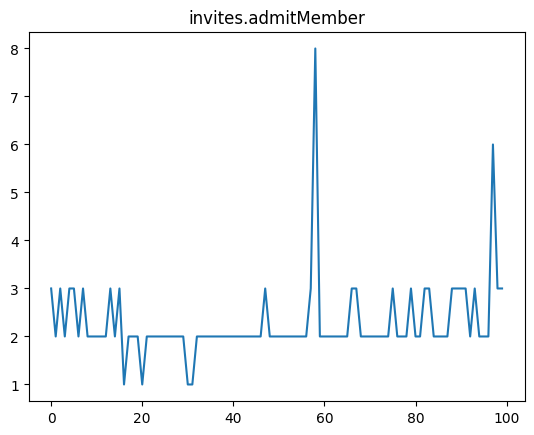

,action,ms,members,n_roles,team_key_gen,roles
0,team.save,1,2,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
1,team.save,1,3,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
2,team.save,0,4,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
3,team.save,1,5,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
4,team.save,0,6,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."


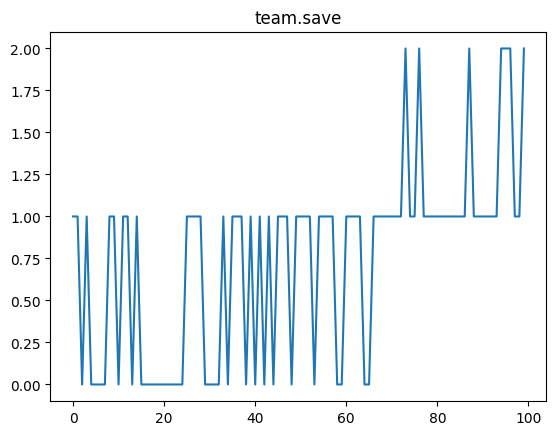

,action,ms,members,n_roles,team_key_gen,roles
0,team.hasRole,0,2,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
1,team.hasRole,0,3,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
2,team.hasRole,0,4,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
3,team.hasRole,0,5,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
4,team.hasRole,0,6,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."


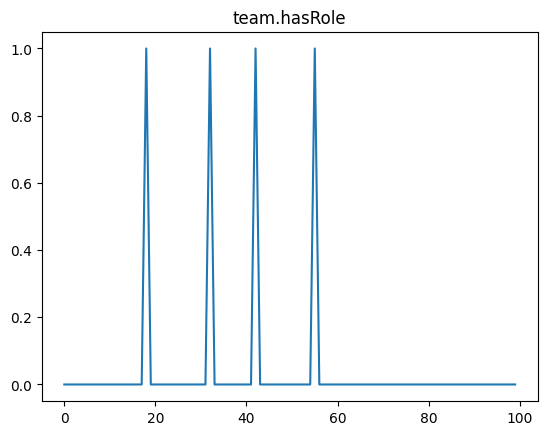

,action,ms,members,n_roles,team_key_gen,roles
0,users.remove,45,101,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
1,users.remove,41,101,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
2,users.remove,40,101,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
3,users.remove,35,101,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
4,users.remove,36,101,2,0,"[{'roleName': 'admin', 'generation': 0}, {'rol..."


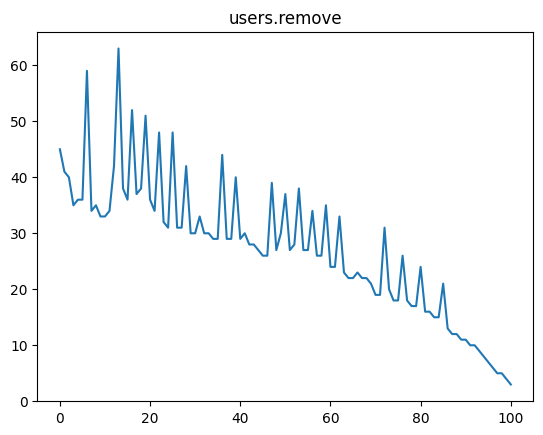

In [22]:
for action in df['action'].unique():
    if len(df[df['action'] == action]) < 2:
        continue
    action_df = df[df['action'] == action]
    action_df = action_df.reset_index(drop=True)
    display(action_df.head())
    # plot
    fig, ax = plt.subplots()
    ax.plot(action_df.index, action_df['ms'], label='ms')
    ax.set_title(action)
    plt.show()

{'roleName': 'admin', 'generation': 0}
{'roleName': 'member', 'generation': 1}


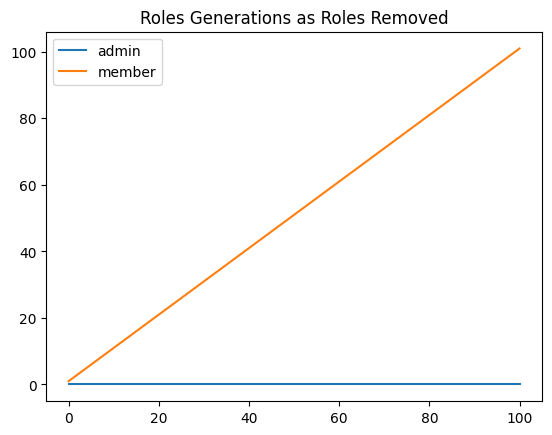

In [19]:
import json
# each row is a dict of roles
remove_roles = df[df['action'] == 'users.remove']
remove_roles = remove_roles.reset_index(drop=True)
roles = remove_roles['roles']
# extract the roleName and generation of each role in each row
for i in range(len(roles)):
    role_template = roles[i]
    if role_template:
        break

fig, ax = plt.subplots()
ax.set_title('Roles Generations as Roles Removed')
for i, role in enumerate(role_template):
    print(role)
    role_name = role['roleName']
    ax.plot(remove_roles.index, remove_roles['roles'].apply(lambda x: x[i]['generation']), label=role_name)

ax.legend()
plt.show()

# plot


Text(0.5, 1.0, 'Add Member Benchmark (Measuring Sigchain Resolution w/ N Members)')

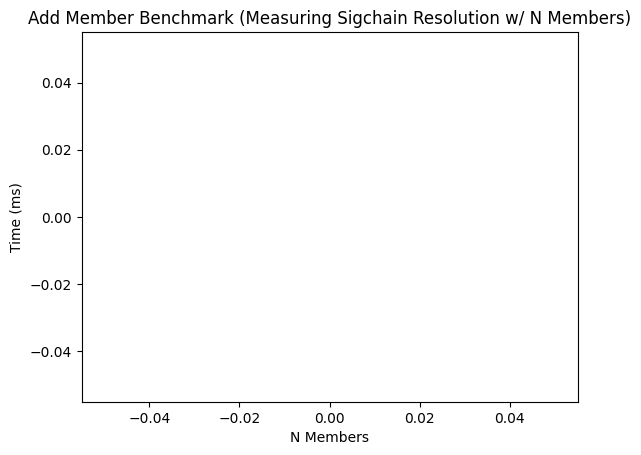

In [ ]:
# plot the data
fig, ax = plt.subplots()
ax.plot(add_members_df.index, add_members_df['ms'], label='addMember')
ax.set_xlabel('N Members')
ax.set_ylabel('Time (ms)')
ax.set_title('Add Member Benchmark (Measuring Sigchain Resolution w/ N Members)')

In [12]:
has_role_df

,action,ms,members,n_roles,team_key_gen,roles


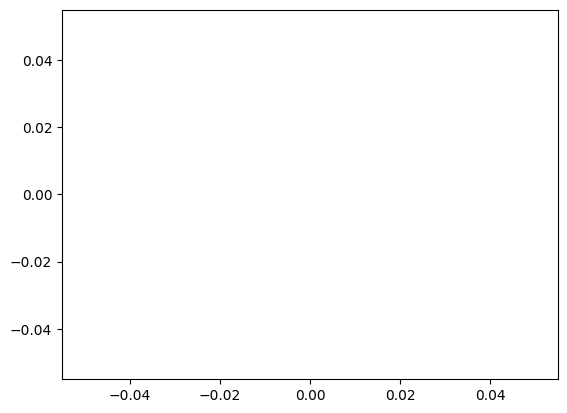

In [10]:

fig2, ax2 = plt.subplots()
ax2.plot(has_role_df.index, has_role_df['ms'], label='memberHasRole')


,action,ms,members,n_roles,team_key_gen,roles


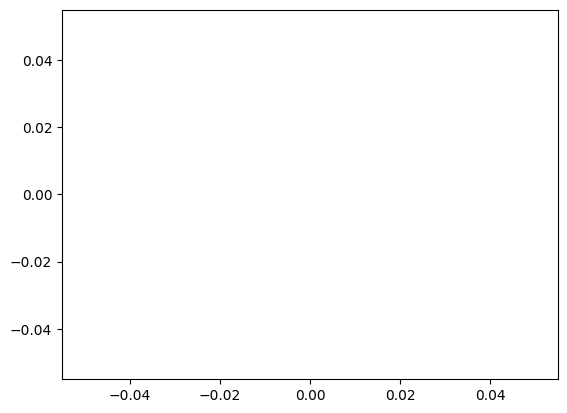

In [11]:
display(team_save_df.head())
fig3, ax3 = plt.subplots()
ax3.plot(team_save_df['members'], team_save_df['ms'], label='team.save')